#2
##2.1
Usamos lo que vimos en el pizarrón:

$E(w_T(b)) = (1.05)^T$

##2.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

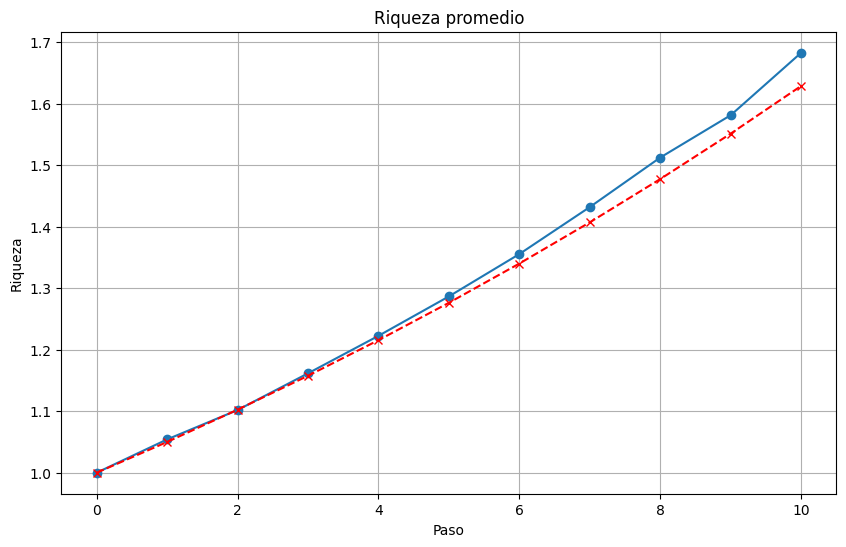

In [2]:
N = 10000
T = 10
b = 0.5
Q_C = 3.0
Q_S = 1.2

w = np.ones((N, T + 1))

for t in range(1, T + 1):
    bets = np.random.rand(N) < 0.5
    w[:, t] = w[:, t-1] * (b * Q_C * bets + (1 - b) * Q_S * (1 - bets))

promedio_riqueza = w.mean(axis=0)

esperanza_ganancia = 1.05 ** np.arange(T + 1)
plt.figure(figsize=(10, 6))
plt.plot(range(T + 1), promedio_riqueza, marker='o')
plt.plot(range(T + 1), esperanza_ganancia, marker='x', linestyle='--', color='red', label='$1.05^T$')
plt.xlabel('Paso')
plt.ylabel('Riqueza')
plt.title('Riqueza promedio')
plt.grid(True)
plt.show()

Viendo este gráfico pareciera que la apuesta conviene...

##2.4

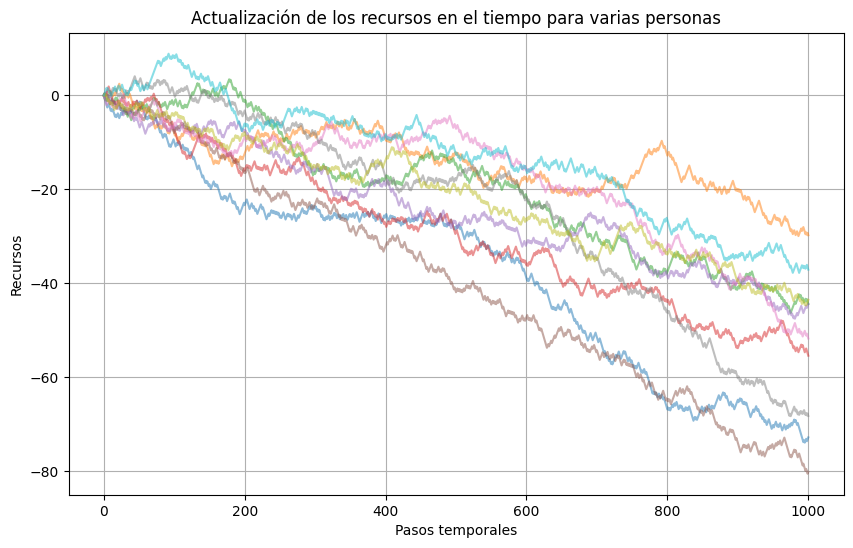

In [10]:
n_personas = 10
T = 1000
b = 0.5 #estrategia
Q_c = 3.0 #pago por cara
Q_s = 1.2  #pago por seca

recursos = np.ones((n_personas, T+1))

for t in range(1, T+1):
    resultados = np.random.choice([1, 0], size=n_personas)
    recursos[:, t] = recursos[:, t-1] * (resultados * (b * Q_c) + (1 - resultados) * ((1 - b) * Q_s))

plt.figure(figsize=(10, 6))
for i in range(n_personas):
    plt.plot(range(T+1), np.log(recursos[i, :]), alpha=0.5) # log

plt.title('Actualización de los recursos en el tiempo para varias personas')
plt.xlabel('Pasos temporales')
plt.ylabel('Recursos')
plt.grid(True)
plt.show()


##2.5

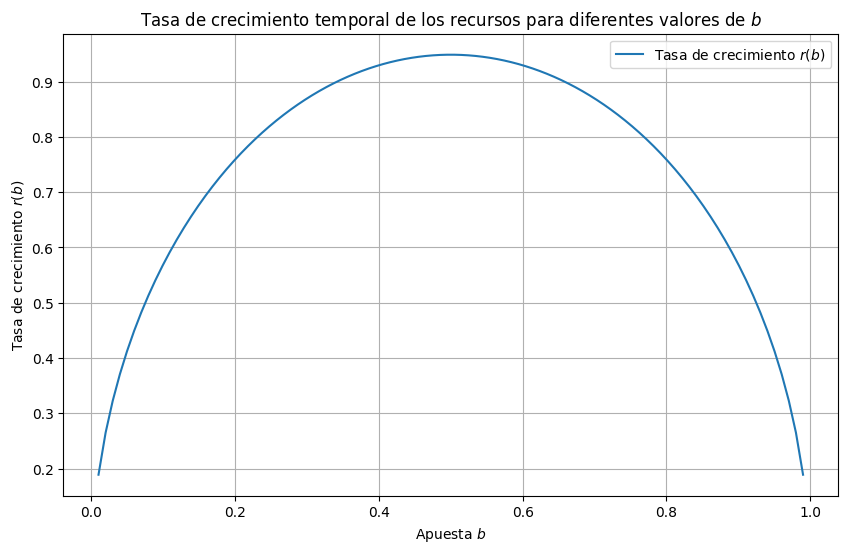

In [4]:
def r(b, Q_c, Q_s, f_c):
    return (b * Q_c) ** f_c * ((1 - b) * Q_s) ** (1 - f_c)

Q_c = 3.0
Q_s = 1.2
f_c = 0.5

b_vals = np.linspace(0.01, 0.99, 100)
r_vals = [r(b, Q_c, Q_s, f_c) for b in b_vals]


plt.figure(figsize=(10, 6))
plt.plot(b_vals, r_vals, label='Tasa de crecimiento $r(b)$')
plt.title('Tasa de crecimiento temporal de los recursos para diferentes valores de $b$')
plt.xlabel('Apuesta $b$')
plt.ylabel('Tasa de crecimiento $r(b)$')
plt.grid(True)
plt.legend()
plt.show()


##2.6

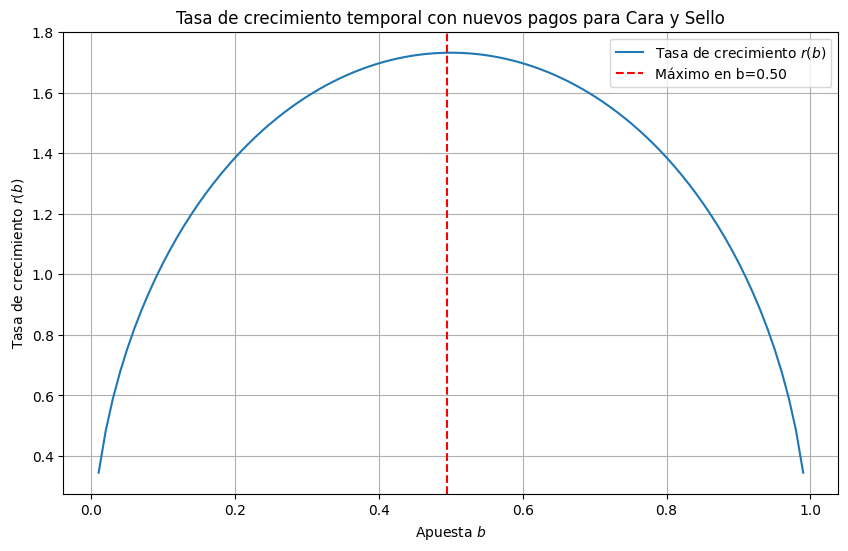

(0.495050505050505, 1.7319659436596724)

In [5]:
Q_c = 10
Q_s = 1.2

b_vals = np.linspace(0.01, 0.99, 100)
r_vals = [r(b, Q_c, Q_s, f_c) for b in b_vals]

b_optimo = b_vals[np.argmax(r_vals)]
tasa_maxima = max(r_vals)

plt.figure(figsize=(10, 6))
plt.plot(b_vals, r_vals, label='Tasa de crecimiento $r(b)$')
plt.axvline(x=b_optimo, color='r', linestyle='--', label=f'Máximo en b={b_optimo:.2f}')
plt.title('Tasa de crecimiento temporal con nuevos pagos para Cara y Sello')
plt.xlabel('Apuesta $b$')
plt.ylabel('Tasa de crecimiento $r(b)$')
plt.grid(True)
plt.legend()
plt.show()

b_optimo, tasa_maxima


Con lo cual b = 0.5 es la apuesta que maximiza las ganancias.

##2.7

Simplificando el cociente de recursos vemos que no depende de $Q_c$ ni de $Q_s$, ya que se cancelan en la fracción.

$
\frac{\omega_T(b)}{\omega_T(d)} = \frac{\omega_0 (b Q_c)^{n_c} ((1 - b) Q_s)^{n_s}}{\omega_0 (d Q_c)^{n_c} ((1 - d) Q_s)^{n_s}}  = \left(\frac{b Q_c}{d Q_c}\right)^{n_c} \left(\frac{(1 - b) Q_s}{(1 - d) Q_s}\right)^{n_s} = \left(\frac{b}{d}\right)^{n_c} \left(\frac{1 - b}{1 - d}\right)^{n_s}
$




##2.8
La tasa de crecimiento para una apuesta $b$ a largo plazo se expresa como:

$
r(b) = \left( \lim_{T \to \infty} \omega_T(b) \right)^{1/T}
$

La diferencia en escala logarítmica es:

$
\log \frac{r(b)}{r(d)} = \log \frac{\lim_{T \to \infty} \omega_0 (b Q_c)^{n_c/T} ((1 - b) Q_s)^{n_s/T}}{\lim_{T \to \infty} \omega_0 (d Q_c)^{n_c/T} ((1 - d) Q_s)^{n_s/T}}  = \log \lim_{T \to \infty} \frac{ \omega_0 (b Q_c)^{n_c/T} ((1 - b) Q_s)^{n_s/T}}{ \omega_0 (d Q_c)^{n_c/T} ((1 - d) Q_s)^{n_s/T}}
$

Simplificando:

$
\log \frac{r(b)}{r(d)} = \log \lim_{T \to \infty} \left( \frac{b^{n_c/T} (1 - b)^{n_s/T}}{d^{n_c/T} (1 - d)^{n_s/T}} \right)
$

Usando que $  \lim_{T \to \infty} \frac{n_c}{T} = p_c $ y$ \frac{n_s}{T} = p_s $, tenemos:

$
\log \frac{r(b)}{r(d)} = p_c \log \frac{b}{d} - p_s \log \frac{1 - b}{1 - d}
$



##2.9

La tasa de crecimiento es:

$
\log r(b) = p \log b + (1 - p) \log (1 - b)
$

Para maximizar $ \log r(b) $, derivo con respecto a $ b$ y encuentro el valor óptimo:

$
\frac{d}{db} \left[ p \log b + (1 - p) \log (1 - b) \right] = \frac{p}{b} - \frac{1 - p}{1 - b}
$

Igualando a cero para encontrar el máximo:

$\frac{p}{b} = \frac{1 - p}{1 - b}
$

Resolviendo para $ b$:

$
b = p
$

#3

##3.1

Usamos librería _networkx_ para gráficos cool (la usamos en Algo III).

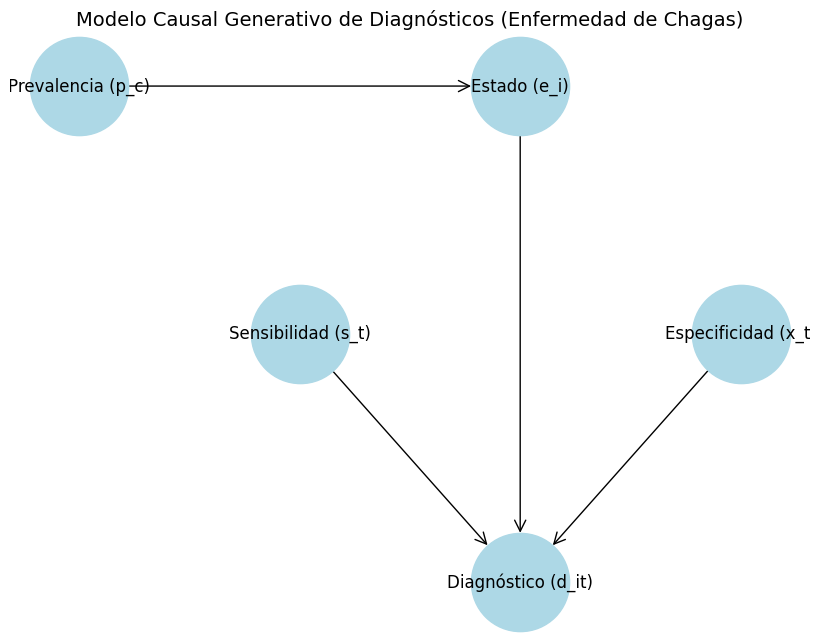

In [6]:
import networkx as nx

G = nx.DiGraph()


G.add_nodes_from(["Prevalencia (p_c)", "Estado (e_i)", "Sensibilidad (s_t)", "Especificidad (x_t)", "Diagnóstico (d_it)"])

G.add_edges_from([("Prevalencia (p_c)", "Estado (e_i)"),
                  ("Estado (e_i)", "Diagnóstico (d_it)"),
                  ("Sensibilidad (s_t)", "Diagnóstico (d_it)"),
                  ("Especificidad (x_t)", "Diagnóstico (d_it)")])

pos = {
    "Prevalencia (p_c)": (0, 1),
    "Estado (e_i)": (2, 1),
    "Sensibilidad (s_t)": (1, 0),
    "Especificidad (x_t)": (3, 0),
    "Diagnóstico (d_it)": (2, -1)
}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", arrowsize=20, arrowstyle='->')

plt.title("Modelo Causal Generativo de Diagnósticos (Enfermedad de Chagas)", size=14)
plt.show()


##3.2

In [7]:
G_alt = nx.DiGraph()

nodos_alt = [
    "Prevalencia p_c"



    ç

    ,
    "Diagnóstico conjunto d_c (#00, #01, #10, #11)",
    "Sensibilidad s_t1",
    "Sensibilidad s_t2",
    "Especificidad x_t1",
    "Especificidad x_t2"
]

G_alt.add_nodes_from(nodos_alt)

edges_alt = [
    ("Prevalencia p_c", "Diagnóstico conjunto d_c (#00, #01, #10, #11)"),
    ("Sensibilidad s_t1", "Diagnóstico conjunto d_c (#00, #01, #10, #11)"),
    ("Sensibilidad s_t2", "Diagnóstico conjunto d_c (#00, #01, #10, #11)"),
    ("Especificidad x_t1", "Diagnóstico conjunto d_c (#00, #01, #10, #11)"),
    ("Especificidad x_t2", "Diagnóstico conjunto d_c (#00, #01, #10, #11)")
]

G_alt.add_edges_from(edges_alt)


plt.figure(figsize=(12, 8))
pos_alt = nx.spring_layout(G_alt)
nx.draw(G_alt, pos_alt, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold', arrowsize=20)
nx.draw_networkx_edges(G_alt, pos_alt, edgelist=edges_alt, arrowstyle='->', arrowsize=15)

plt.title("Modelo Causal Alternativo de Diagnósticos Conjuntos")
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-7-57362a2ee28c>, line 4)